**Imports**

In [1]:
# Third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns

# Goggle
from goggle.GoggleModel import GoggleModel

# Synthcity
from synthcity.plugins.core.dataloader import GenericDataLoader

/home/rob/miniconda3/envs/goggle10/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2023-03-07 13:49:09,345 - Created a temporary directory at /tmp/tmpdtjwdpsf
2023-03-07 13:49:09,346 - Writing /tmp/tmpdtjwdpsf/_remote_module_non_scriptable.py


**Load data**

In [2]:
dataset = "breast"
X = pd.read_csv("../data/breast_cancer_2.csv")

ind = list(range(len(X.columns)))
ind = [x for x in ind if x != X.columns.get_loc("target")]
col_list = X.columns[ind]
ct = ColumnTransformer(
    [("scaler", StandardScaler(), col_list)], remainder="passthrough"
)

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.0


**Fit model**

In [3]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=16,
    decoder_l=2,
    threshold=0.1,
    decoder_arch="gcn",
    graph_prior=None,
    prior_mask=None,
    device="cpu",
    beta=1,
    learning_rate=0.01,
    seed=42,
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (act): Sigmoid()
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=31, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=31, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=31, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): GraphConv(
        in=16, out=8, normalization=both
        (_activation): Tanh()
      )
      (1): GraphConv(in=8, out=1, normalization=both, activation=None)
    )
  )
)

In [4]:
gen.fit(X_train)

[Epoch 100/1000, patience 20] train: 18.099, val: 18.095
[Epoch 200/1000, patience  3] train: 12.730, val: 12.670
[Epoch 300/1000, patience 11] train: 10.284, val: 10.318
[Epoch 400/1000, patience  0] train: 9.707, val: 9.710
[Epoch 500/1000, patience  2] train: 8.539, val: 8.134
[Epoch 600/1000, patience  0] train: 7.155, val: 6.956
[Epoch 700/1000, patience 10] train: 6.218, val: 6.190
[Epoch 800/1000, patience 33] train: 6.047, val: 5.998
Training terminated after 856 epochs


**Evaluate synthetic data**

In [5]:
X_synth = gen.sample(X_test)
X_synth.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,target
0,2.504512,2.129761,2.415749,2.420512,1.218303,2.346588,2.710417,2.564111,1.243595,0.954310,...,1.982277,2.488797,2.596135,1.465930,2.073017,2.178146,2.476569,1.219000,1.258155,1.0
1,0.950926,0.152415,0.944118,0.991429,0.988792,0.863530,-0.031762,1.073197,0.368201,0.261938,...,0.009295,1.026077,1.107552,1.067990,0.703182,0.692037,1.066624,0.132740,0.370123,1.0
2,-0.629308,-0.897506,-0.570727,-0.564126,0.838139,-0.028367,-0.086106,-0.062171,0.855325,0.363275,...,-0.757362,-0.555391,-0.326079,0.532902,0.008358,-0.071637,0.039955,0.631474,0.124176,0.0
3,-0.025021,-0.714142,-0.006568,-0.012678,0.024459,0.002774,0.515484,0.180029,0.625887,0.019394,...,-0.571973,-0.131341,-0.056817,-0.617020,-0.192071,0.116931,0.080383,-0.236340,-0.209734,1.0
4,0.192985,0.671357,0.148208,0.130678,0.537933,0.333188,0.067833,0.365101,0.837022,0.294203,...,0.829671,0.173643,0.110955,0.521188,0.550100,0.522907,0.590347,0.583963,0.356270,1.0


In [6]:
X_synth_loader = GenericDataLoader(
    X_synth,
    target_column="target",
)
X_test_loader = GenericDataLoader(
    X_test,
    target_column="target",
)

res = gen.evaluate_synthetic(X_synth_loader, X_test_loader)
print(f"Quality: {res[0]:.3f}")
print(f"Detection: {res[2]:.3f}")
print(
    f"Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}, diff: {(res[1][0] - res[1][1]):.3f}"
)

Quality: 0.603
Detection: 0.636
Performance on real: 0.980, on synth: 0.857, diff: 0.123


**Generate TSNE plots**

In [7]:
X_test["label"] = "Original"
X_synth["label"] = "Synthetic"

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df["label"]
x_data = concat_df.drop(["label", "target"], axis=1)

In [8]:
tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

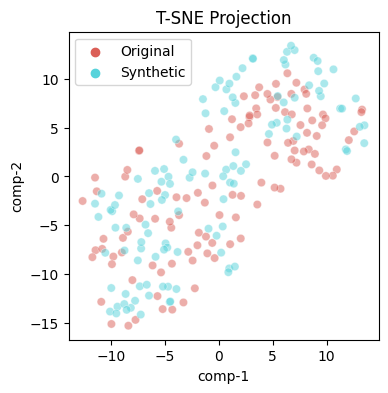

In [9]:
plt.figure(figsize=(4, 4))
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=df.y.tolist(),
    palette=sns.color_palette("hls", 2),
    alpha=0.5,
    data=df,
).set(title=f"T-SNE Projection")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()

plt.show()

**Visualise adjacency matrix**

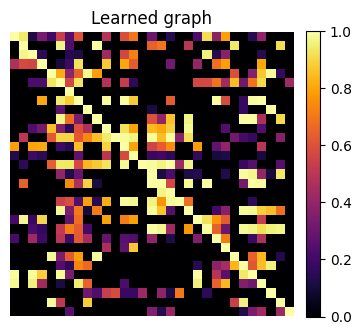

In [10]:
adj_matrix = gen.model.learned_graph(100).cpu().detach().numpy()
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap="inferno", interpolation="nearest", vmin=0, vmax=1.0)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Learned graph")
plt.axis("off")
plt.show()